In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, VPacker

plt.rcParams.update({'font.size': 18})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
# MBPP
base = np.array([1.000, 1.000, 1.000, 1.000])
sft_25 = (np.array([1.531, 1.087, 1.904, 1.560]) - base) * 100
sft_100 = (np.array([1.621, 1.256, 2.227, 2.349]) - base) * 100
dpo_qvs = (np.array([0.929, 1.024, 0.719, 0.520]) - base) * 100
dpo_pvf = (np.array([1.167, 1.172, 0.662, 0.565]) - base) * 100
dpo_all = (np.array([0.981, 0.947, 0.660, 0.549]) - base) * 100

mbpp = pd.DataFrame({
    '$\mathcal{SFT}_{25}$': sft_25,
    '$\mathcal{SFT}_{100}$': sft_100,
    '$\mathcal{DPO}_{QvS}$': dpo_qvs,
    '$\mathcal{DPO}_{PvF}$': dpo_pvf,
    '$\mathcal{DPO}_{All}$': dpo_all,
})

mbpp.index = ['1B', '3B', '7B', '13B']

In [3]:
# HE
base = np.array([1.000, 1.000, 1.000, 1.000])
sft_25 = (np.array([1.451, 1.059, 1.359, 1.273]) - base) * 100
sft_100 = (np.array([1.412, 1.169, 1.615, 2.008]) - base) * 100
dpo_qvs = (np.array([1.007, 1.046, 0.843, 0.774]) - base) * 100
dpo_pvf = (np.array([1.172, 1.116, 0.883, 0.840]) - base) * 100
dpo_all = (np.array([1.062, 0.996, 0.850, 0.756]) - base) * 100

he = pd.DataFrame({
    '$\mathcal{SFT}_{25}$': sft_25,
    '$\mathcal{SFT}_{100}$': sft_100,
    '$\mathcal{DPO}_{QvS}$': dpo_qvs,
    '$\mathcal{DPO}_{PvF}$': dpo_pvf,
    '$\mathcal{DPO}_{All}$': dpo_all,
})

he.index = ['1B', '3B', '7B', '13B']

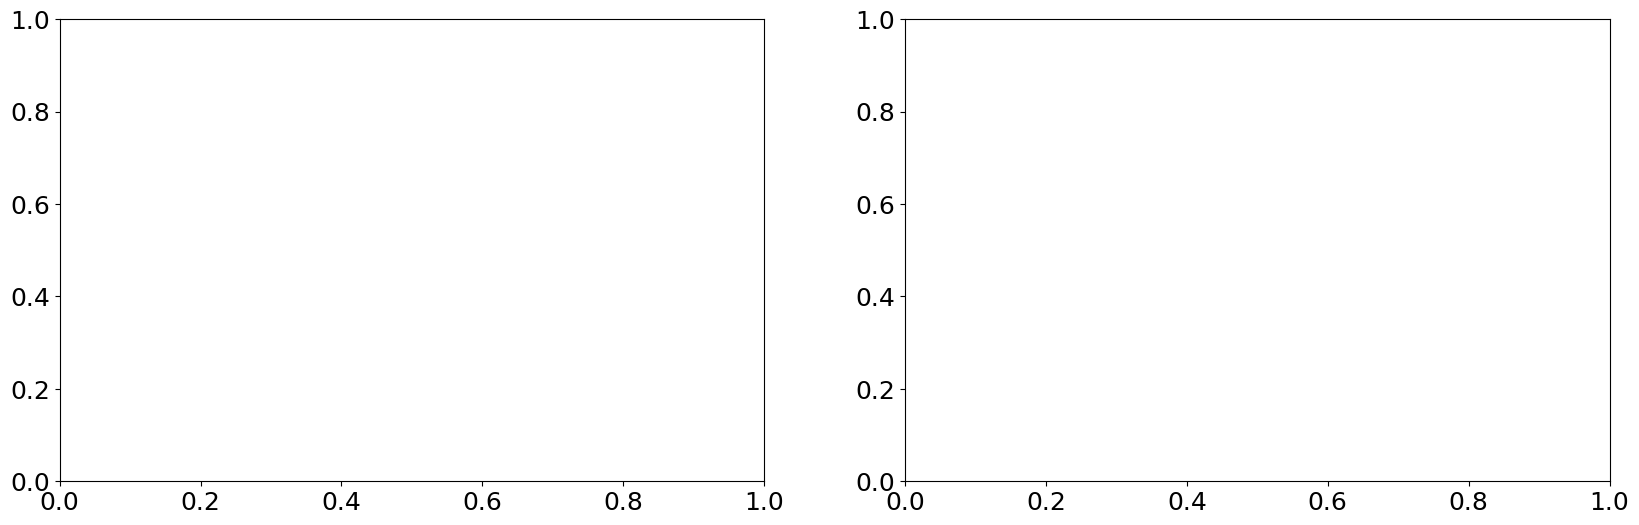

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

In [5]:
axes[0].set_axisbelow(True)
axes[1].set_axisbelow(True)

In [6]:
mbpp.plot.bar(ax=axes[0], legend=False, rot=0, width=0.7, alpha=0.99, color=colors[1:]).grid(axis='y', linestyle='--')
he.plot.bar(ax=axes[1], legend=False, rot=0, width=0.7, alpha=0.99, color=colors[1:]).grid(axis='y', linestyle='--')

In [7]:
patterns = ['/', '\\', '-', 'o', '.', '*'][1:]

bars = axes[0].patches
hatches = ''.join(h * len(mbpp) for h in patterns)

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
    
bars = axes[1].patches
hatches = ''.join(h * len(he) for h in patterns)

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

In [8]:
axes[0].set_title('MBPP')
axes[1].set_title('HumanEval')

Text(0.5, 1.0, 'HumanEval')

In [9]:
ybox1 = TextArea('Longer →', textprops=dict(color='r', size=14, rotation=90, ha='left'))
ybox2 = TextArea(' | ',     textprops=dict(color='k', size=14, rotation=90, ha='left'))
ybox3 = TextArea('← Shorter', textprops=dict(color='g', size=14, rotation=90, ha='left'))

ybox = VPacker(children=[ybox1, ybox2, ybox3])

In [10]:
anchored_ybox = AnchoredOffsetbox(
    loc='center', child=ybox, frameon=False, bbox_to_anchor=(-0.15, 0.28), bbox_transform=axes[0].transAxes
)
axes[0].add_artist(anchored_ybox)

anchored_ybox = AnchoredOffsetbox(
    loc='center', child=ybox, frameon=False, bbox_to_anchor=(-0.15, 0.22), bbox_transform=axes[1].transAxes
)
axes[1].add_artist(anchored_ybox)

In [11]:
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

In [12]:
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), ncol=len(labels))

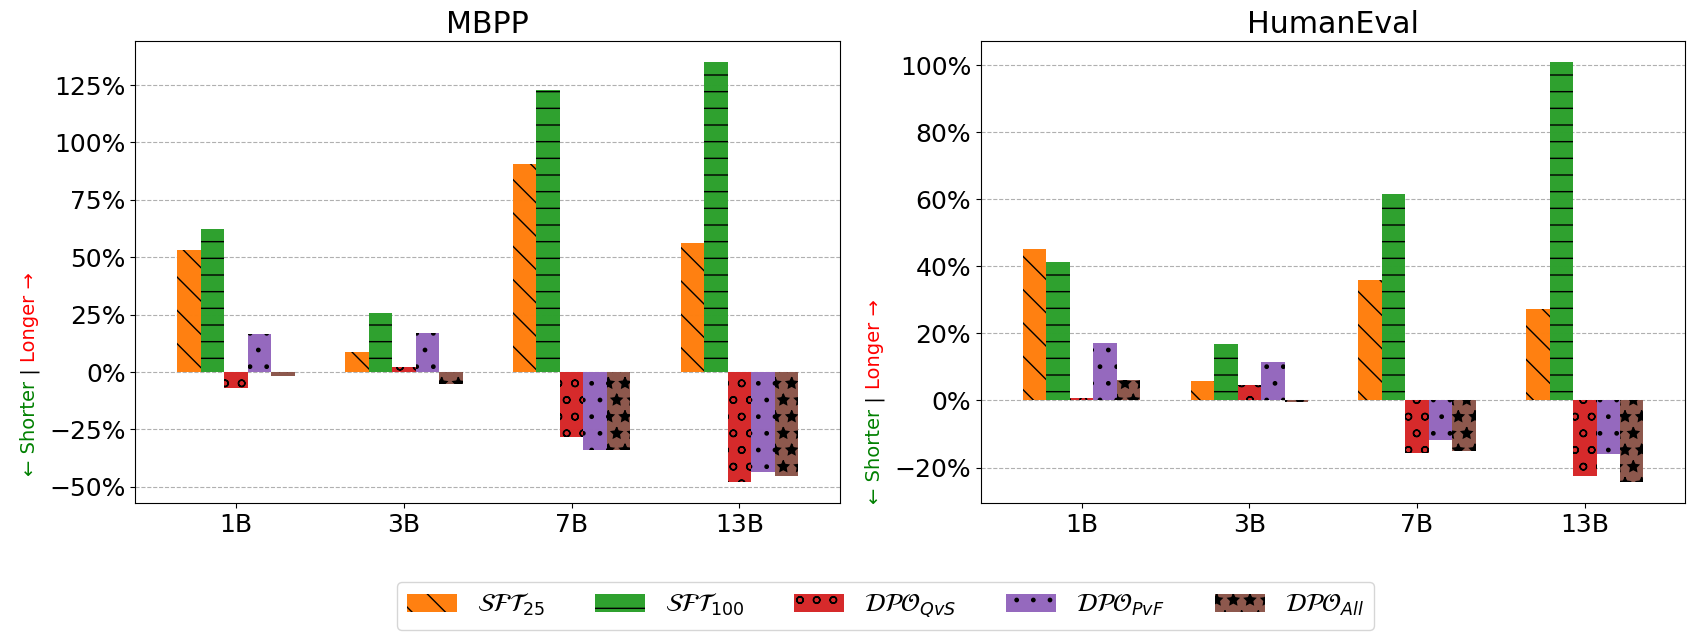

In [13]:
fig

In [14]:
fig.savefig('length_scale.pdf', bbox_inches='tight')